# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [47]:
import pandas as pd

import seaborn as sns
import graphviz

from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



In [3]:
arquivo = pd.read_csv('housing.csv')
df = pd.DataFrame(arquivo)

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
df.drop(columns=['ocean_proximity'], inplace=True)

In [17]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [20]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


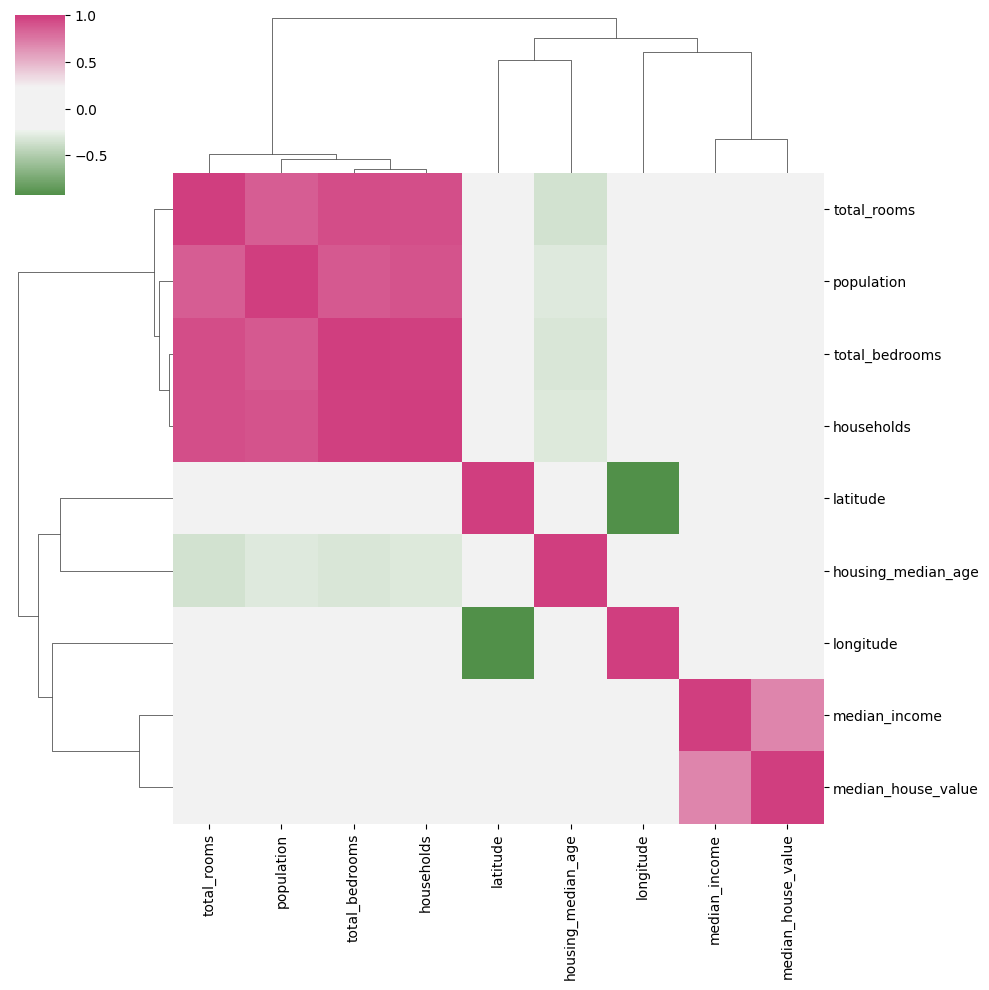

In [22]:
cmap = sns.diverging_palette(h_neg = 125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap(df.corr(), figsize=(10,10), center=0, cmap=cmap)

Verificando os dados acima é possível perceber que a média salarial tem correlação com o vaalor médio da casa. Além disso, as características da casa tem forte correlação com a população e famílias. 

### 3. Separe os dados em validação e teste

In [26]:
y = df['population']
df.drop(columns=['population'], inplace=True)

In [28]:
X_train, X_teste, y_train, y_teste = train_test_split(df, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [31]:
tree_1 = DecisionTreeRegressor(max_depth=2)
tree_2 = DecisionTreeRegressor(max_depth=8)

tree_1.fit(X_train,y_train)
tree_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [34]:
mse1 = tree_1.score(X_train,y_train)
mse2 = tree_2.score(X_train,y_train)
template = 'o R-quadrado da árvore com profundidade = {0} é: {1:.2f}'
print(template.format(tree_1.get_depth(),mse1).replace('.',','))
print(template.format(tree_2.get_depth(),mse2).replace('.',','))

o R-quadrado da árvore com profundidade = 2 é: 0,68
o R-quadrado da árvore com profundidade = 8 é: 0,91


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore com profundidade 8 para ser mais adequada, pois apresenta um coeficiente de determinação igual 0.91

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

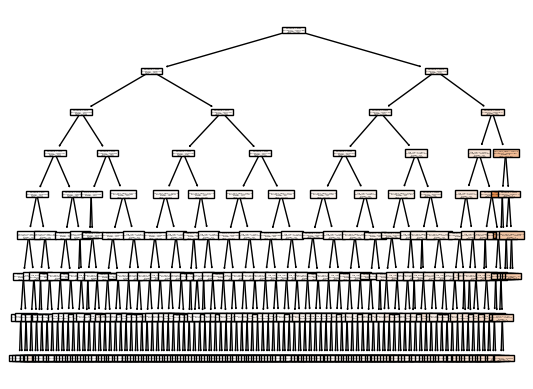

In [39]:
tp =tree.plot_tree(tree_2,feature_names=df.columns,filled=True)

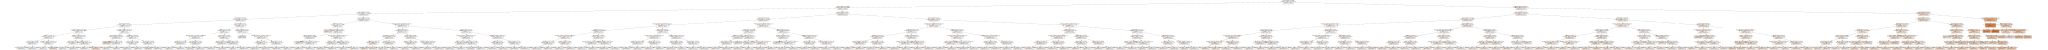

In [55]:
dot_data = tree.export_graphviz(tree_2, out_file=None, feature_names=df.columns, filled=True)
graph = graphviz.Source(dot_data, format='png')
graph

Verificando a análise acima a variável que me parece mais importante é a households, pois ela foi escolhida pelo alogoritmo com raiz. Desta forma, ela é aquela variável capaz de proporcionar a maior separação inicial de dados